<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import style
import seaborn as sns

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [63]:
movies = pd.read_csv('./data/imdb_1000.csv')

#### Check the number of rows and columns.

In [64]:
print('\033[1m' '\033[95m' f'R: There are {len(movies)} rows and {len(movies.columns)} columns')

R: There are 979 rows and 6 columns


#### Check the data type of each column.

In [65]:
print('\033[1m' '\033[95m'f' R: data type of each column:\n\n{movies.dtypes}')

 R: data type of each column:

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object


#### Calculate the average movie duration.

In [66]:
print('\033[1m' '\033[95m' f"R: The average movie duration is {int(movies['duration'].mean())} minutes")

R: The average movie duration is 120 minutes


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [67]:
longest=movies['duration'].max()
shortest=movies['duration'].min()
print('\033[1m' '\033[95m'f"R:\n\
The longest movie, at {longest} minutes, is {movies.loc[movies['duration'] == longest]['title'].values[0]}\n\
The shortest movie, at {shortest} minutes, is {movies.loc[movies['duration'] == shortest]['title'].values[0]}")

R:
The longest movie, at 242 minutes, is Hamlet
The shortest movie, at 64 minutes, is Freaks


#### Create a histogram of duration, choosing an "appropriate" number of bins.

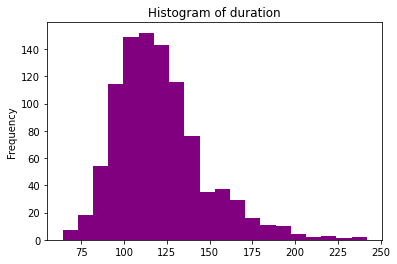

In [68]:
style.use = 'fivethirtyeight'
movies.duration.plot(kind='hist',title='Histogram of duration',bins=20,color='purple');

#### Use a box plot to display that same data.

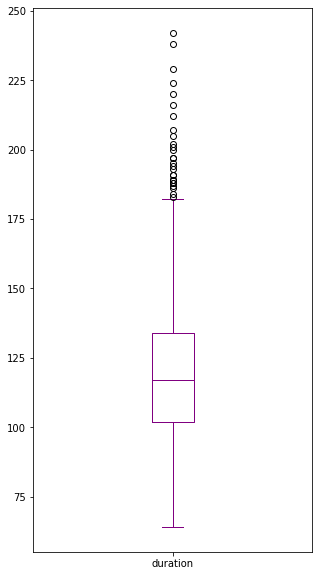

In [69]:
movies.duration.plot(kind='box',figsize=(5,10),color='purple');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [70]:
how_many_per_content_rating = movies.groupby('content_rating').count()['title'].sort_values(ascending=False)
how_many_per_content_rating.to_frame(name='number of movies')

,number of movies
content_rating,
R,460
PG-13,189
PG,123
NOT RATED,65
APPROVED,47
UNRATED,38
G,32
PASSED,7
NC-17,7


#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 0, 'number of movies')

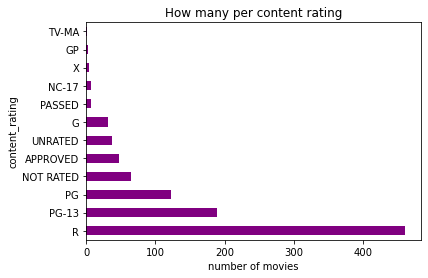

In [71]:
how_many_per_content_rating.plot(kind='barh',title ='How many per content rating',color='purple')
plt.xlabel('number of movies')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [72]:
import numpy as np
movies.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'],'UNRATED',inplace=True)
movies.groupby('content_rating').count()['title'].sort_values(ascending = False).to_frame(name='number of movies')

,number of movies
content_rating,
R,460
PG-13,189
UNRATED,160
PG,123
G,32
NC-17,7
X,4
TV-MA,1


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [73]:
movies.replace(['X', 'TV-MA'],'NC-17',inplace =True)
movies.groupby('content_rating').count()['title'].sort_values(ascending = False).to_frame('numer of movies')

,numer of movies
content_rating,
R,460
PG-13,189
UNRATED,160
PG,123
G,32
NC-17,12


#### Count the number of missing values in each column.

In [74]:
movies.isnull().sum().to_frame(name='values missing')

,values missing
star_rating,0
title,0
content_rating,3
genre,0
duration,0
actors_list,0


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [75]:
movies[movies.isnull().any(axis=1)]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [76]:
movies['content_rating'].fillna(value={187:'resonable1',649:'resonable2',936:'resonable3'},inplace=True)

In [77]:
movies.iloc[[187,649,936]]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,resonable1,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,resonable2,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,resonable3,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [78]:
movies['longer_than_2h']=movies['duration']<=120
movies.groupby('longer_than_2h').mean()[['star_rating']]

,star_rating
longer_than_2h,
False,7.95367
True,7.83849


#### Use a visualization to detect whether there is a relationship between duration and star rating.

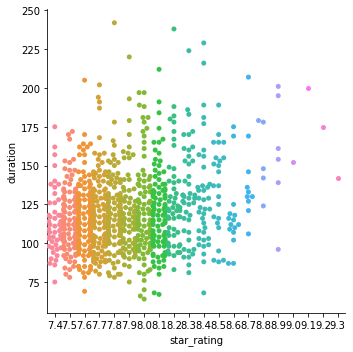

In [79]:
sns.catplot(x='star_rating', y='duration', kind='swarm', data=movies);

#### Calculate the average duration for each genre.

In [80]:
movies.groupby('genre').mean()[['duration']].astype(np.int64).sort_values('duration',ascending = False)

,duration
genre,
Western,136
Adventure,134
Biography,131
Action,126
Drama,126
Crime,122
Mystery,115
Thriller,114
Fantasy,112


## Advanced level

#### Visualize the relationship between content rating and duration.

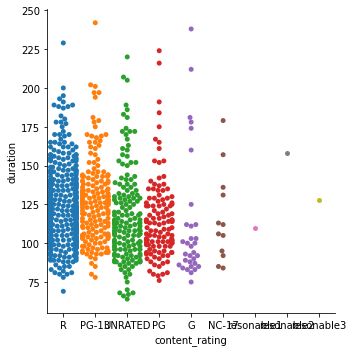

In [81]:
sns.catplot(y='duration', x='content_rating', kind='swarm', data=movies);

#### Determine the top rated movie (by star rating) for each genre.

In [82]:
top_rated= movies.groupby('genre')[['star_rating']].max().reset_index()
top_rated.merge(movies)[['genre','title','star_rating']].sort_values('star_rating',ascending = False).\
                                                     style.hide_index().format({'star_rating':'{:.2f}'})

genre,title,star_rating
Crime,The Shawshank Redemption,9.30
Action,The Dark Knight,9.00
Adventure,The Lord of the Rings: The Return of the King,8.90
Drama,12 Angry Men,8.90
Drama,Fight Club,8.90
Biography,Schindler's List,8.90
Western,"The Good, the Bad and the Ugly",8.90
Comedy,City Lights,8.60
Comedy,Modern Times,8.60
Comedy,Life Is Beautiful,8.60


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [83]:
movies.loc[movies.duplicated(subset='title', keep=False)>0].sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list,longer_than_2h
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",True
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",False
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",False
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",False
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",False
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",False
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",True
936,7.4,True Grit,resonable3,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",False


In [84]:
movies.duplicated().all()==True

False

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [85]:
genres1=movies.groupby('genre').count()['title']
genres1=genres1[genres1.values>10]

In [86]:
genre_avg=movies.groupby('genre').mean()['star_rating']

In [87]:
pd.concat([genres1,genre_avg],axis=1).dropna().sort_values('title',ascending=False)

,title,star_rating
Drama,278.0,7.902518
Comedy,156.0,7.822436
Action,136.0,7.884559
Crime,124.0,7.916935
Biography,77.0,7.862338
Adventure,75.0,7.933333
Animation,62.0,7.914516
Horror,29.0,7.806897
Mystery,16.0,7.975000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [88]:
genres2=movies['genre'].value_counts()
genres2=genres2[genres2.values>10]

In [89]:
option2=pd.concat([genres2,genre_avg],axis=1)
option2[option2['genre']>10].sort_values('genre',ascending=False)

,genre,star_rating
Drama,278.0,7.902518
Comedy,156.0,7.822436
Action,136.0,7.884559
Crime,124.0,7.916935
Biography,77.0,7.862338
Adventure,75.0,7.933333
Animation,62.0,7.914516
Horror,29.0,7.806897
Mystery,16.0,7.975000


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [90]:
genre_avg=movies.groupby('genre').mean()['star_rating']
boolean_series= movies.groupby('genre').count()['title']>10

In [91]:
concat= pd.concat([genre_avg,boolean_series],axis=1)
concat[concat.title==True]

,star_rating,title
genre,,
Action,7.884559,True
Adventure,7.933333,True
Animation,7.914516,True
Biography,7.862338,True
Comedy,7.822436,True
Crime,7.916935,True
Drama,7.902518,True
Horror,7.806897,True
Mystery,7.975000,True


#### Option 4: aggregate by count and mean, then filter using the count

In [92]:
all = movies.groupby('genre').agg({'star_rating': 'mean','title' : 'count'})
all[all['title']>10].sort_values('title',ascending=False)

,star_rating,title
genre,,
Drama,7.902518,278
Comedy,7.822436,156
Action,7.884559,136
Crime,7.916935,124
Biography,7.862338,77
Adventure,7.933333,75
Animation,7.914516,62
Horror,7.806897,29
Mystery,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!

Question: How many actors are in the whole IMDB list?

In [138]:
all_actors= movies['actors_list'].values.tolist()
actors=[]
actors = [x.split("u'")[1] for x in all_actors]
actors = [x.replace("', ","") for x in actors ]

In [139]:
df = pd.DataFrame(actors)

In [143]:
print(f'There are {len(df[0].unique())} actors in the {movies.shape[0]} movies in the IMDB file')

There are 583 actors in the 979 movies in the IMDB file
